In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
matches = pd.read_csv('matches.csv')
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,15:00 (21:00),Premier League,Matchweek 1,Sat,Home,W,2,0,Wolves,...,Match Report,NaN,18,6,17.3,0,0,0,2022,Arsenal
1,2024-08-24,17:30 (23:30),Premier League,Matchweek 2,Sat,Away,W,2,0,Aston Villa,...,Match Report,NaN,9,4,18.8,0,0,0,2022,Arsenal
2,2024-08-31,12:30 (18:30),Premier League,Matchweek 3,Sat,Home,D,1,1,Brighton,...,Match Report,NaN,11,7,12.9,0,0,0,2022,Arsenal
3,2024-09-15,14:00 (20:00),Premier League,Matchweek 4,Sun,Away,W,1,0,Tottenham,...,Match Report,NaN,7,4,12.1,0,0,0,2022,Arsenal
4,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,D,2,2,Manchester City,...,Match Report,NaN,5,3,11.3,0,0,0,2022,Arsenal


In [3]:
matches.shape

(1292, 28)

In [4]:
matches['team'].value_counts()

team
Arsenal                     76
Manchester City             76
Chelsea                     76
Newcastle United            76
Nottingham Forest           76
Brighton and Hove Albion    76
Fulham                      76
Crystal Palace              76
Everton                     76
Manchester United           76
Wolverhampton Wanderers     76
Leicester City              38
Ipswich Town                38
Southampton                 38
Liverpool                   38
Aston Villa                 38
Tottenham Hotspur           38
West Ham United             38
Bournemouth                 38
Brentford                   38
Luton Town                  38
Burnley                     38
Sheffield United            38
Name: count, dtype: int64

In [5]:
matches['round'].value_counts()

round
Matchweek 1     34
Matchweek 2     34
Matchweek 3     34
Matchweek 4     34
Matchweek 5     34
Matchweek 6     34
Matchweek 7     34
Matchweek 8     34
Matchweek 9     34
Matchweek 10    34
Matchweek 11    34
Matchweek 12    34
Matchweek 13    34
Matchweek 14    34
Matchweek 15    34
Matchweek 16    34
Matchweek 17    34
Matchweek 18    34
Matchweek 19    34
Matchweek 20    34
Matchweek 21    34
Matchweek 22    34
Matchweek 23    34
Matchweek 24    34
Matchweek 25    34
Matchweek 26    34
Matchweek 27    34
Matchweek 28    34
Matchweek 29    34
Matchweek 30    34
Matchweek 31    34
Matchweek 32    34
Matchweek 33    34
Matchweek 34    34
Matchweek 35    34
Matchweek 36    34
Matchweek 37    34
Matchweek 38    34
Name: count, dtype: int64

In [6]:
matches.dtypes

date              object
time              object
comp              object
round             object
day               object
venue             object
result            object
gf                 int64
ga                 int64
opponent          object
xg               float64
xga              float64
poss               int64
attendance         int64
captain           object
formation         object
opp formation     object
referee           object
match report      object
notes            float64
sh                 int64
sot                int64
dist             float64
fk                 int64
pk                 int64
pkatt              int64
season             int64
team              object
dtype: object

In [7]:
# Convert 'date' column to datetime format
matches['date'] = pd.to_datetime(matches['date'])
matches.dtypes

date             datetime64[ns]
time                     object
comp                     object
round                    object
day                      object
venue                    object
result                   object
gf                        int64
ga                        int64
opponent                 object
xg                      float64
xga                     float64
poss                      int64
attendance                int64
captain                  object
formation                object
opp formation            object
referee                  object
match report             object
notes                   float64
sh                        int64
sot                       int64
dist                    float64
fk                        int64
pk                        int64
pkatt                     int64
season                    int64
team                     object
dtype: object

In [8]:
# convert 'venue' column to categorical type
matches['venue_code'] = matches['venue'].astype('category').cat.codes #convert strings to category , to integer codes
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
0,2024-08-17,15:00 (21:00),Premier League,Matchweek 1,Sat,Home,W,2,0,Wolves,...,NaN,18,6,17.3,0,0,0,2022,Arsenal,1
1,2024-08-24,17:30 (23:30),Premier League,Matchweek 2,Sat,Away,W,2,0,Aston Villa,...,NaN,9,4,18.8,0,0,0,2022,Arsenal,0
2,2024-08-31,12:30 (18:30),Premier League,Matchweek 3,Sat,Home,D,1,1,Brighton,...,NaN,11,7,12.9,0,0,0,2022,Arsenal,1
3,2024-09-15,14:00 (20:00),Premier League,Matchweek 4,Sun,Away,W,1,0,Tottenham,...,NaN,7,4,12.1,0,0,0,2022,Arsenal,0
4,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,D,2,2,Manchester City,...,NaN,5,3,11.3,0,0,0,2022,Arsenal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-04-24,20:00 (02:00),Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,...,NaN,10,4,17.8,1,0,0,2021,Sheffield United,0
1288,2024-04-27,15:00 (21:00),Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,...,NaN,15,4,13.5,0,0,0,2021,Sheffield United,0
1289,2024-05-04,15:00 (21:00),Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,...,NaN,16,4,18.1,0,1,1,2021,Sheffield United,1
1290,2024-05-11,15:00 (21:00),Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,...,NaN,13,1,21.0,0,0,0,2021,Sheffield United,0


In [9]:
# convert 'opponent' column to interger codes
matches['opponent_code'] = matches['opponent'].astype('category').cat.codes


In [10]:
matches['hour'] = matches['time'].str.replace(':.+', '',regex=True).astype('int')


In [11]:
matches["day_code"] = matches['date'].dt.dayofweek

In [12]:
matches['target'] = (matches['result'] == 'W').astype('int') # 1: win , 0: lose or draw

In [13]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opponent_code,hour,day_code,target
0,2024-08-17,15:00 (21:00),Premier League,Matchweek 1,Sat,Home,W,2,0,Wolves,...,0,0,0,2022,Arsenal,1,22,15,5,1
1,2024-08-24,17:30 (23:30),Premier League,Matchweek 2,Sat,Away,W,2,0,Aston Villa,...,0,0,0,2022,Arsenal,0,1,17,5,1
2,2024-08-31,12:30 (18:30),Premier League,Matchweek 3,Sat,Home,D,1,1,Brighton,...,0,0,0,2022,Arsenal,1,4,12,5,0
3,2024-09-15,14:00 (20:00),Premier League,Matchweek 4,Sun,Away,W,1,0,Tottenham,...,0,0,0,2022,Arsenal,0,20,14,6,1
4,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,D,2,2,Manchester City,...,0,0,0,2022,Arsenal,0,14,16,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-04-24,20:00 (02:00),Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,...,1,0,0,2021,Sheffield United,0,15,20,2,0
1288,2024-04-27,15:00 (21:00),Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,...,0,0,0,2021,Sheffield United,0,16,15,5,0
1289,2024-05-04,15:00 (21:00),Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,...,0,1,1,2021,Sheffield United,1,17,15,5,0
1290,2024-05-11,15:00 (21:00),Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,...,0,0,0,2021,Sheffield United,0,8,15,5,0


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = matches[['sh', 'gf', 'venue_code', 'day_code', 'hour']]
y = matches['target']

# Split data using the same date-based approach as the rest of the program
train_data = matches[matches['date'] < '2025-01-01']
test_data = matches[matches['date'] > '2025-01-01']

# Get corresponding X and y for train and test
X_train = train_data[['sh', 'gf', 'venue_code', 'day_code', 'hour']]
X_test = test_data[['sh', 'gf', 'venue_code', 'day_code', 'hour']]
y_train = train_data['target']
y_test = test_data['target']

# Create and train the model with consistent parameters
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.797752808988764

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       164
           1       0.79      0.65      0.71       103

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [15]:
# First split the data into train and test
train_data = matches[matches['date'] < '2025-01-01']
test_data = matches[matches['date'] > '2025-01-01']

# Feature Engineering: Calculate rolling averages for team performance
def calculate_team_stats(data):
    data = data.sort_values('date')
    
    # Calculate rolling averages (last 3 matches)
    rolling_stats = data[['sh', 'gf']].rolling(3, min_periods=1).mean()
    data['sh_rolling_avg'] = rolling_stats['sh']
    data['gf_rolling_avg'] = rolling_stats['gf']
    
    # Calculate form (points from last 5 matches)
    points = data['result'].map({'W': 3, 'D': 1, 'L': 0})
    data['form'] = points.rolling(5, min_periods=1).sum()
    
    return data

# Apply feature engineering separately to train and test sets
train_enhanced = train_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)
test_enhanced = test_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)

# Create feature set
enhanced_features = [
    'venue_code', 'day_code', 'hour',
    'sh', 'gf', 'sh_rolling_avg', 'gf_rolling_avg', 'form'
]

# Prepare X and y for both sets
X_train_enhanced = train_enhanced[enhanced_features]
y_train = train_enhanced['target']

X_test_enhanced = test_enhanced[enhanced_features]
y_test = test_enhanced['target']

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_enhanced, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Make predictions with best model
y_pred_enhanced = best_rf.predict(X_test_enhanced)
y_pred_proba = best_rf.predict_proba(X_test_enhanced)

print("Best parameters:", grid_search.best_params_)
print("\nImproved Model Accuracy:", accuracy_score(y_test, y_pred_enhanced))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_enhanced))

C:\Users\hp\AppData\Local\Temp\ipykernel_14908\2087360399.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_enhanced = train_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14908\2087360399.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_enhanced = test_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}

Improved Model Accuracy: 0.8314606741573034

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       164
           1       0.85      0.68      0.76       103

    accuracy                           0.83       267
   macro avg       0.84      0.80      0.81       267
weighted avg       0.83      0.83      0.83       267



In [16]:
# Create a function to prepare match data for prediction
def prepare_match_data(match_info):
    # Convert match info to DataFrame
    match_df = pd.DataFrame([match_info])
    
    # Map venue to venue_code
    venue_mapping = dict(zip(matches['venue'].unique(), range(len(matches['venue'].unique()))))
    match_df['venue_code'] = match_df['venue'].map(venue_mapping)
    
    # Ensure all required features are present
    for feature in enhanced_features:
        if feature not in match_df.columns:
            match_df[feature] = 0
    
    return match_df[enhanced_features]

# Test with some real match scenarios
test_matches = [
    {
        'venue': matches['venue'].iloc[0],  # Using a known venue
        'day_code': 5,  # Saturday
        'hour': 20,
        'sh': 15,  # 15 shots
        'gf': 2,   # 2 goals
        'sh_rolling_avg': 14.5,
        'gf_rolling_avg': 1.8,
        'form': 12  # Good form (4 wins in last 5)
    },
    {
        'venue': matches['venue'].iloc[1],  # Using another known venue
        'day_code': 6,  # Sunday
        'hour': 17,
        'sh': 8,   # 8 shots
        'gf': 1,   # 1 goal
        'sh_rolling_avg': 10.2,
        'gf_rolling_avg': 1.2,
        'form': 6   # Average form (2 wins in last 5)
    }
]

# Make predictions for test matches
for i, match in enumerate(test_matches, 1):
    match_data = prepare_match_data(match)
    win_prob = best_rf.predict_proba(match_data)[0][1]
    prediction = best_rf.predict(match_data)[0]
    
    print(f"\nMatch {i}:")
    print(f"Prediction: {'Win' if prediction == 1 else 'Loss/Draw'}")
    print(f"Win Probability: {win_prob:.2%}")
    print("Key Factors:")
    print(f"- Form: {match['form']} points in last 5 matches")
    print(f"- Recent Goals: {match['gf_rolling_avg']:.1f} goals per game")
    print(f"- Recent Shots: {match['sh_rolling_avg']:.1f} shots per game")


Match 1:
Prediction: Win
Win Probability: 82.29%
Key Factors:
- Form: 12 points in last 5 matches
- Recent Goals: 1.8 goals per game
- Recent Shots: 14.5 shots per game

Match 2:
Prediction: Loss/Draw
Win Probability: 12.96%
Key Factors:
- Form: 6 points in last 5 matches
- Recent Goals: 1.2 goals per game
- Recent Shots: 10.2 shots per game


Text(0.5, 0, 'Importance Score')

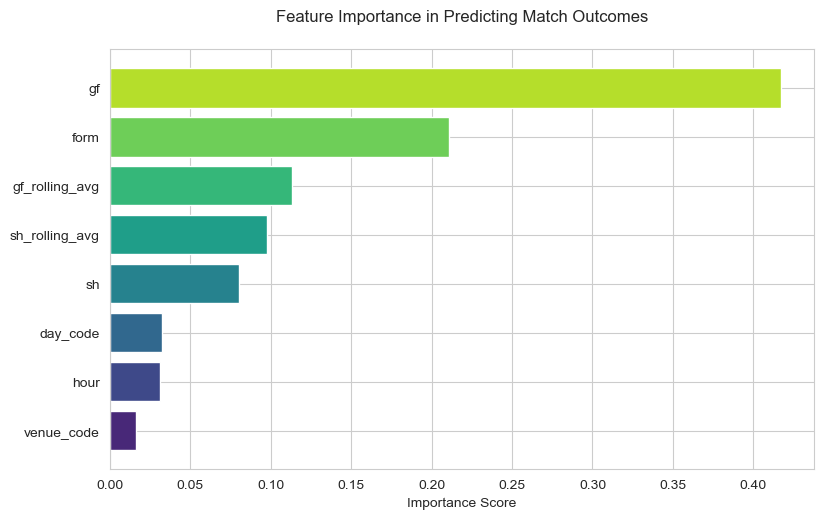

In [17]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style settings
plt.style.use('default')  # Reset to default style
sns.set_style("whitegrid")  # Apply seaborn's whitegrid style

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

# 1. Feature Importance Plot
plt.subplot(2, 2, 1)
importance_df = pd.DataFrame({
    'feature': enhanced_features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(y=importance_df['feature'], width=importance_df['importance'], 
         color=sns.color_palette("viridis", len(importance_df)))
plt.title('Feature Importance in Predicting Match Outcomes', 
          fontsize=12, pad=20)
plt.xlabel('Importance Score')



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [20]:
train = matches[matches['date'] < '2025-01-01'] # we use the past data to predict the future data

In [21]:
test = matches[matches['date']> '2025-01-01']

In [22]:
predictors = ['venue_code', 'opponent_code', 'hour', 'day_code']

In [23]:
rf.fit(train[predictors], train['target']) # train RF by using predictors to predict target

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [24]:
print("Training samples:", len(train))
print("Test samples:", len(test))

Training samples: 1024
Test samples: 267


In [25]:
preds = rf.predict(test[predictors]) # predict the target for test data

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
acc = accuracy_score(test['target'], preds)
acc

0.5880149812734082

In [28]:
combined = pd.DataFrame({'prediction': preds, 'actual': test['target']})

In [29]:
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,124,40
1,70,33


In [30]:
from sklearn.metrics import precision_score

In [31]:
precision_score(test['target'], preds)

0.4520547945205479

split our matches data frame up by team because what we want to do is compute rolling averages for team performance how did this team do in the past few game(how many goals,etc )

In [32]:
grouped_matches = matches.groupby('team')

In [33]:
group = grouped_matches.get_group('Manchester City')
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opponent_code,hour,day_code,target
38,2024-08-18,16:30 (22:30),Premier League,Matchweek 1,Sun,Away,W,2,0,Chelsea,...,0,0,0,2022,Manchester City,0,6,16,6,1
39,2024-08-24,15:00 (21:00),Premier League,Matchweek 2,Sat,Home,W,4,1,Ipswich Town,...,1,1,1,2022,Manchester City,1,10,15,5,1
40,2024-08-31,17:30 (23:30),Premier League,Matchweek 3,Sat,Away,W,3,1,West Ham,...,1,0,0,2022,Manchester City,0,21,17,5,1
41,2024-09-14,15:00 (21:00),Premier League,Matchweek 4,Sat,Home,W,2,1,Brentford,...,0,0,0,2022,Manchester City,1,3,15,5,1
42,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Home,D,2,2,Arsenal,...,1,0,0,2022,Manchester City,1,0,16,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2024-04-28,16:30 (22:30),Premier League,Matchweek 35,Sun,Away,W,2,0,Nott'ham Forest,...,1,0,0,2021,Manchester City,0,17,16,6,1
566,2024-05-04,17:30 (23:30),Premier League,Matchweek 36,Sat,Home,W,5,1,Wolves,...,0,2,2,2021,Manchester City,1,22,17,5,1
567,2024-05-11,12:30 (18:30),Premier League,Matchweek 37,Sat,Away,W,4,0,Fulham,...,0,1,1,2021,Manchester City,0,9,12,5,1
568,2024-05-14,20:00 (02:00),Premier League,Matchweek 34,Tue,Away,W,2,0,Tottenham,...,0,1,1,2021,Manchester City,0,20,20,1,1


This method is aim to : for example if we are in week 5 we want to use the previous 4 weeks matches for predict the week 5

In [34]:
def rolling_average(group, cols, new_cols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean() # calculate rolling average of the last 3 matches, 'left' means exclude the current match
    group[new_cols] = rolling_stats # assign the rolling averages to new columns
    group = group.dropna(subset=new_cols) # drop rows with NaN values in the new columns
    return group

gf: Goals For (goals scored),
ga: Goals Against (goals conceded),
sh: Shots,
sot: Shots on Target,
dist: Distance (total distance each shot travled),
fk: Free Kicks,
pk: Penalties Kicked/Scored,
pkatt: Penalty Kick Attempts

In [35]:
cols = ['gf', 'ga', 'sh','sot','dist', 'fk', 'pk', 'pkatt']
new_cols = [f'{col}_rolling' for col in cols] # create new column names for rolling averages
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [36]:
rolling_average(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
535,2023-09-02,15:00 (21:00),Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,5,1,2.000000,0.333333,20.000000,7.000000,16.366667,0.666667,0.000000,0.333333
536,2023-09-16,15:00 (21:00),Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,5,1,2.666667,0.666667,16.333333,5.666667,16.666667,0.666667,0.333333,0.666667
537,2023-09-23,15:00 (21:00),Premier League,Matchweek 6,Sat,Home,W,2,0,Nott'ham Forest,...,5,1,3.333333,1.000000,21.333333,8.666667,16.166667,1.000000,0.333333,0.666667
538,2023-09-30,15:00 (21:00),Premier League,Matchweek 7,Sat,Away,L,1,2,Wolves,...,5,0,3.333333,0.666667,14.000000,7.000000,16.133333,1.000000,0.333333,0.333333
539,2023-10-08,16:30 (22:30),Premier League,Matchweek 8,Sun,Away,L,0,1,Arsenal,...,6,0,2.000000,1.000000,19.666667,8.333333,17.633333,1.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2025-04-22,20:00 (02:00),Premier League,Matchweek 34,Tue,Home,W,2,1,Aston Villa,...,1,1,2.333333,0.666667,14.000000,6.333333,17.500000,0.666667,0.000000,0.000000
72,2025-05-02,20:00 (02:00),Premier League,Matchweek 35,Fri,Home,W,1,0,Wolves,...,4,1,3.000000,1.000000,15.666667,6.666667,15.133333,0.333333,0.000000,0.000000
73,2025-05-10,15:00 (21:00),Premier League,Matchweek 36,Sat,Away,D,0,0,Southampton,...,5,0,1.666667,0.333333,11.666667,4.666667,16.766667,0.000000,0.000000,0.000000
74,2025-05-20,20:00 (02:00),Premier League,Matchweek 37,Tue,Home,W,3,1,Bournemouth,...,1,1,1.000000,0.333333,16.333333,4.000000,17.400000,0.666667,0.000000,0.000000


In [37]:
matches_rolling = matches.groupby('team').apply(lambda x: rolling_average(x, cols, new_cols)) # apply rolling average to all teams
matches_rolling

C:\Users\hp\AppData\Local\Temp\ipykernel_14908\2828498990.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby('team').apply(lambda x: rolling_average(x, cols, new_cols)) # apply rolling average to all teams


date            time            comp  \
team                                                                     
Arsenal                 573 2023-09-03  16:30  (22:30)  Premier League   
                        574 2023-09-17  16:30  (22:30)  Premier League   
                        575 2023-09-24  14:00  (20:00)  Premier League   
                        576 2023-09-30  15:00  (21:00)  Premier League   
                        577 2023-10-08  16:30  (22:30)  Premier League   
...                                ...             ...             ...   
Wolverhampton Wanderers 413 2025-04-26  15:00  (21:00)  Premier League   
                        414 2025-05-02  20:00  (02:00)  Premier League   
                        415 2025-05-10  15:00  (21:00)  Premier League   
                        416 2025-05-20  20:00  (02:00)  Premier League   
                        417 2025-05-25  16:00  (22:00)  Premier League   

                                    round  day venue result  gf  ga  \
team                                                                  
Arsenal                 573   Matchweek 4  Sun  Home      W   3   1   
                        574   Matchweek 5  Sun  Away      W   1   0   
                        575   Matchweek 6  Sun  Home      D   2   2   
                        576   Matchweek 7  Sat  Away      W   4   0   
                        577   Matchweek 8  Sun  Home      W   1   0   
...                                   ...  ...   ...    ...  ..  ..   
Wolverhampton Wanderers 413  Matchweek 34  Sat  Home      W   3   0   
                        414  Matchweek 35  Fri  Away      L   0   1   
                        415  Matchweek 36  Sat  Home      L   0   2   
                        416  Matchweek 37  Tue  Away      L   2   4   
                        417  Matchweek 38  Sun  Home      D   1   1   

                                    opponent  ...  day_code  target  \
team                                          ...                     
Arsenal                 573   Manchester Utd  ...         6       1   
                        574          Everton  ...         6       1   
                        575        Tottenham  ...         6       0   
                        576      Bournemouth  ...         5       1   
                        577  Manchester City  ...         6       1   
...                                      ...  ...       ...     ...   
Wolverhampton Wanderers 413   Leicester City  ...         5       1   
                        414  Manchester City  ...         4       0   
                        415         Brighton  ...         5       0   
                        416   Crystal Palace  ...         1       0   
                        417        Brentford  ...         6       0   

                             gf_rolling  ga_rolling sh_rolling sot_rolling  \
team                                                                         
Arsenal                 573    1.666667    1.000000  15.333333    6.000000   
                        574    2.000000    1.000000  16.000000    5.333333   
                        575    2.000000    1.000000  16.000000    6.000000   
                        576    2.000000    1.000000  14.000000    4.333333   
                        577    2.333333    0.666667  12.666667    4.666667   
...                                 ...         ...        ...         ...   
Wolverhampton Wanderers 413    2.333333    1.000000  13.000000    4.333333   
                        414    2.666667    0.666667  12.333333    4.000000   
                        415    1.333333    0.333333  10.000000    2.333333   
                        416    1.000000    1.000000  12.000000    2.666667   
                        417    0.666667    2.333333   9.333333    2.000000   

                            dist_rolling fk_rolling pk_rolling  pkatt_rolling  
team                                                                           
Arsenal                 573    16.433333   0.000

In [38]:
matches_rolling = matches_rolling.droplevel('team') # to remove the multi-index created by groupby
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
573,2023-09-03,16:30 (22:30),Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,6,1,1.666667,1.000000,15.333333,6.000000,16.433333,0.000000,0.666667,0.666667
574,2023-09-17,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,6,1,2.000000,1.000000,16.000000,5.333333,15.066667,0.000000,0.666667,0.666667
575,2023-09-24,14:00 (20:00),Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,...,6,0,2.000000,1.000000,16.000000,6.000000,15.400000,0.000000,0.333333,0.333333
576,2023-09-30,15:00 (21:00),Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,...,5,1,2.000000,1.000000,14.000000,4.333333,16.433333,0.000000,0.333333,0.333333
577,2023-10-08,16:30 (22:30),Premier League,Matchweek 8,Sun,Home,W,1,0,Manchester City,...,6,1,2.333333,0.666667,12.666667,4.666667,16.600000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2025-04-26,15:00 (21:00),Premier League,Matchweek 34,Sat,Home,W,3,0,Leicester City,...,5,1,2.333333,1.000000,13.000000,4.333333,16.433333,0.666667,0.000000,0.000000
414,2025-05-02,20:00 (02:00),Premier League,Matchweek 35,Fri,Away,L,0,1,Manchester City,...,4,0,2.666667,0.666667,12.333333,4.000000,18.633333,1.000000,0.000000,0.000000
415,2025-05-10,15:00 (21:00),Premier League,Matchweek 36,Sat,Home,L,0,2,Brighton,...,5,0,1.333333,0.333333,10.000000,2.333333,18.900000,0.666667,0.000000,0.000000
416,2025-05-20,20:00 (02:00),Premier League,Matchweek 37,Tue,Away,L,2,4,Crystal Palace,...,1,0,1.000000,1.000000,12.000000,2.666667,17.200000,0.333333,0.000000,0.000000


In [39]:
matches_rolling.index = range(matches_rolling.shape[0]) # reset the index
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2023-09-03,16:30 (22:30),Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,6,1,1.666667,1.000000,15.333333,6.000000,16.433333,0.000000,0.666667,0.666667
1,2023-09-17,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,6,1,2.000000,1.000000,16.000000,5.333333,15.066667,0.000000,0.666667,0.666667
2,2023-09-24,14:00 (20:00),Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,...,6,0,2.000000,1.000000,16.000000,6.000000,15.400000,0.000000,0.333333,0.333333
3,2023-09-30,15:00 (21:00),Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,...,5,1,2.000000,1.000000,14.000000,4.333333,16.433333,0.000000,0.333333,0.333333
4,2023-10-08,16:30 (22:30),Premier League,Matchweek 8,Sun,Home,W,1,0,Manchester City,...,6,1,2.333333,0.666667,12.666667,4.666667,16.600000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2025-04-26,15:00 (21:00),Premier League,Matchweek 34,Sat,Home,W,3,0,Leicester City,...,5,1,2.333333,1.000000,13.000000,4.333333,16.433333,0.666667,0.000000,0.000000
1219,2025-05-02,20:00 (02:00),Premier League,Matchweek 35,Fri,Away,L,0,1,Manchester City,...,4,0,2.666667,0.666667,12.333333,4.000000,18.633333,1.000000,0.000000,0.000000
1220,2025-05-10,15:00 (21:00),Premier League,Matchweek 36,Sat,Home,L,0,2,Brighton,...,5,0,1.333333,0.333333,10.000000,2.333333,18.900000,0.666667,0.000000,0.000000
1221,2025-05-20,20:00 (02:00),Premier League,Matchweek 37,Tue,Away,L,2,4,Crystal Palace,...,1,0,1.000000,1.000000,12.000000,2.666667,17.200000,0.333333,0.000000,0.000000


In [40]:
def make_predictions(data, predictors):
    train = data[data['date'] < '2025-01-01']
    test = data[data['date'] > '2025-01-01']
    rf.fit(train[predictors], train['target'])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test['target'], predicted=preds),index=test.index)
    precision = precision_score(test['target'], preds)
    return combined, precision

In [41]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)
print("Precision:", precision)

Precision: 0.5526315789473685


In [42]:
combined

,actual,predicted
54,0,0
55,1,0
56,0,0
57,1,0
58,1,0
...,...,...
1218,1,0
1219,0,0
1220,0,0
1221,0,0


In [43]:
combined = combined.merge(matches_rolling[['date','team','opponent','result']], left_index=True, right_index=True)
combined

,actual,predicted,date,team,opponent,result
54,0,0,2025-01-04,Arsenal,Brighton,D
55,1,0,2025-01-15,Arsenal,Tottenham,W
56,0,0,2025-01-18,Arsenal,Aston Villa,D
57,1,0,2025-01-25,Arsenal,Wolves,W
58,1,0,2025-02-02,Arsenal,Manchester City,W
...,...,...,...,...,...,...
1218,1,0,2025-04-26,Wolverhampton Wanderers,Leicester City,W
1219,0,0,2025-05-02,Wolverhampton Wanderers,Manchester City,L
1220,0,0,2025-05-10,Wolverhampton Wanderers,Brighton,L
1221,0,0,2025-05-20,Wolverhampton Wanderers,Crystal Palace,L


In [44]:
class MissingDict(dict):
    __missing__ = lambda self, key: key
#This creates a special dictionary class that returns the key itself if the key isn't found in the dictionary, instead of raising a KeyError. The __missing__ method is called when a key lookup fails.
map_values = {
    "Brighton": "Brighton & Hove Albion",
    "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves",
}
mapping = MissingDict(**map_values)

In [45]:
mapping["West Ham United"]  # Example usage of the mapping

'West Ham'

In [46]:
combined['new_team'] = combined['team'].map(mapping) # change team names to more common names in opponents
combined

,actual,predicted,date,team,opponent,result,new_team
54,0,0,2025-01-04,Arsenal,Brighton,D,Arsenal
55,1,0,2025-01-15,Arsenal,Tottenham,W,Arsenal
56,0,0,2025-01-18,Arsenal,Aston Villa,D,Arsenal
57,1,0,2025-01-25,Arsenal,Wolves,W,Arsenal
58,1,0,2025-02-02,Arsenal,Manchester City,W,Arsenal
...,...,...,...,...,...,...,...
1218,1,0,2025-04-26,Wolverhampton Wanderers,Leicester City,W,Wolves
1219,0,0,2025-05-02,Wolverhampton Wanderers,Manchester City,L,Wolves
1220,0,0,2025-05-10,Wolverhampton Wanderers,Brighton,L,Wolves
1221,0,0,2025-05-20,Wolverhampton Wanderers,Crystal Palace,L,Wolves


In [47]:
merged = combined.merge(combined, left_on=['date', 'new_team'], right_on=['date', 'opponent'])
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2025-01-04,Arsenal,Brighton,D,Arsenal,0,0,Brighton and Hove Albion,Arsenal,D,Brighton and Hove Albion
1,1,0,2025-01-25,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2025-02-02,Arsenal,Manchester City,W,Arsenal,0,0,Manchester City,Arsenal,L,Manchester City
3,1,0,2025-02-15,Arsenal,Leicester City,W,Arsenal,0,0,Leicester City,Arsenal,L,Leicester City
4,0,1,2025-02-26,Arsenal,Nott'ham Forest,D,Arsenal,0,0,Nottingham Forest,Arsenal,D,Nottingham Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,0,2025-04-20,Wolverhampton Wanderers,Manchester Utd,W,Wolves,0,1,Manchester United,Wolves,L,Manchester Utd
152,1,0,2025-04-26,Wolverhampton Wanderers,Leicester City,W,Wolves,0,0,Leicester City,Wolves,L,Leicester City
153,0,0,2025-05-02,Wolverhampton Wanderers,Manchester City,L,Wolves,1,0,Manchester City,Wolves,W,Manchester City
154,0,0,2025-05-10,Wolverhampton Wanderers,Brighton,L,Wolves,1,0,Brighton and Hove Albion,Wolves,W,Brighton and Hove Albion


In [48]:
merged[(merged["predicted_x"]==1)&(merged["predicted_y"]==0)]['actual_x'].value_counts()

actual_x
0    12
1    12
Name: count, dtype: int64

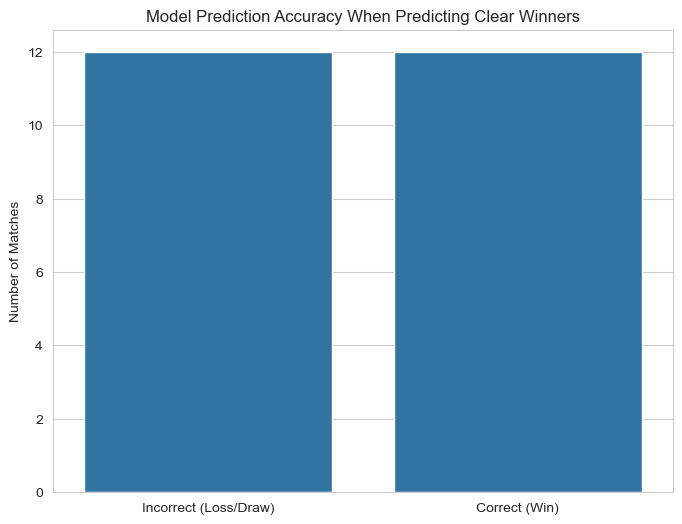

In [49]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x=['Incorrect (Loss/Draw)', 'Correct (Win)'], y=[12, 12])
plt.title('Model Prediction Accuracy When Predicting Clear Winners')
plt.ylabel('Number of Matches')
plt.show()

# Improving the Model

We'll improve the model using several techniques:
1. Feature Engineering & Selection
2. Hyperparameter Tuning with GridSearchCV
3. Cross-Validation
4. Ensemble Methods

In [50]:
# Feature Engineering

# Calculate team form (last 5 matches)
def calculate_form(group):
    group = group.sort_values('date')
    # Convert results to points first
    points = group['result'].map({'W': 3, 'D': 1, 'L': 0})
    # Calculate rolling sum of points
    group['form'] = points.rolling(5, closed='left').sum().fillna(0)
    return group

# Apply form calculation
matches_enhanced = matches.groupby('team').apply(calculate_form)
matches_enhanced = matches_enhanced.reset_index(drop=True)

# Add head-to-head feature
def get_h2h_stats(row, history):
    h2h = history[
        ((history['team'] == row['team']) & (history['opponent'] == row['opponent'])) |
        ((history['team'] == row['opponent']) & (history['opponent'] == row['team']))
    ]
    h2h = h2h[h2h['date'] < row['date']].tail(5)
    if len(h2h) == 0:
        return 0
    team_wins = sum((h2h['team'] == row['team']) & (h2h['result'] == 'W')) +\
                sum((h2h['team'] == row['opponent']) & (h2h['result'] == 'L'))
    return team_wins / len(h2h)

# Calculate H2H stats
matches_enhanced['h2h_win_rate'] = matches_enhanced.apply(
    lambda row: get_h2h_stats(row, matches_enhanced), axis=1
)

# Update predictors with new features
enhanced_predictors = predictors + [
    'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
    'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling',
    'form', 'h2h_win_rate'
]

C:\Users\hp\AppData\Local\Temp\ipykernel_14908\3084965595.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_enhanced = matches.groupby('team').apply(calculate_form)


In [51]:
# Feature Engineering

# Calculate rolling averages first
cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
new_cols = [f'{col}_rolling' for col in cols]

def rolling_average(group, cols, new_cols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    return group

# Apply rolling averages
matches_enhanced = matches.groupby('team').apply(rolling_average, cols=cols, new_cols=new_cols)
matches_enhanced = matches_enhanced.reset_index(drop=True)

# Calculate team form (last 5 matches)
def calculate_form(group):
    group = group.sort_values('date')
    # Convert results to points first
    points = group['result'].map({'W': 3, 'D': 1, 'L': 0})
    # Calculate rolling sum of points
    group['form'] = points.rolling(5, closed='left').sum().fillna(0)
    return group

# Apply form calculation
matches_enhanced = matches_enhanced.groupby('team').apply(calculate_form)
matches_enhanced = matches_enhanced.reset_index(drop=True)

# Add head-to-head feature
def get_h2h_stats(row, history):
    h2h = history[
        ((history['team'] == row['team']) & (history['opponent'] == row['opponent'])) |
        ((history['team'] == row['opponent']) & (history['opponent'] == row['team']))
    ]
    h2h = h2h[h2h['date'] < row['date']].tail(5)
    if len(h2h) == 0:
        return 0
    team_wins = sum((h2h['team'] == row['team']) & (h2h['result'] == 'W')) +\
                sum((h2h['team'] == row['opponent']) & (h2h['result'] == 'L'))
    return team_wins / len(h2h)

# Calculate H2H stats
matches_enhanced['h2h_win_rate'] = matches_enhanced.apply(
    lambda row: get_h2h_stats(row, matches_enhanced), axis=1
)

# Fill any remaining NaN values with 0
matches_enhanced = matches_enhanced.fillna(0)

# Update predictors with new features
enhanced_predictors = predictors + [
    'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
    'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling',
    'form', 'h2h_win_rate'
]

# Verify all features are present
print("Missing features:", [col for col in enhanced_predictors if col not in matches_enhanced.columns])

C:\Users\hp\AppData\Local\Temp\ipykernel_14908\1246813374.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_enhanced = matches.groupby('team').apply(rolling_average, cols=cols, new_cols=new_cols)
C:\Users\hp\AppData\Local\Temp\ipykernel_14908\1246813374.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_enhanced = matches_enhanced.groupby('team').apply(calculate_form)


Missing features: []


In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
base_rf = RandomForestClassifier(random_state=1)

# Prepare training data
train_data = matches_enhanced[matches_enhanced['date'] < '2025-01-01']
test_data = matches_enhanced[matches_enhanced['date'] > '2025-01-01']

# Perform grid search
grid_search = GridSearchCV(
    base_rf,
    param_grid,
    cv=5,
    scoring='precision',
    n_jobs=-1
)

grid_search.fit(train_data[enhanced_predictors], train_data['target'])

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validation score: 0.6232648062748626


Precision with optimized model: 0.576


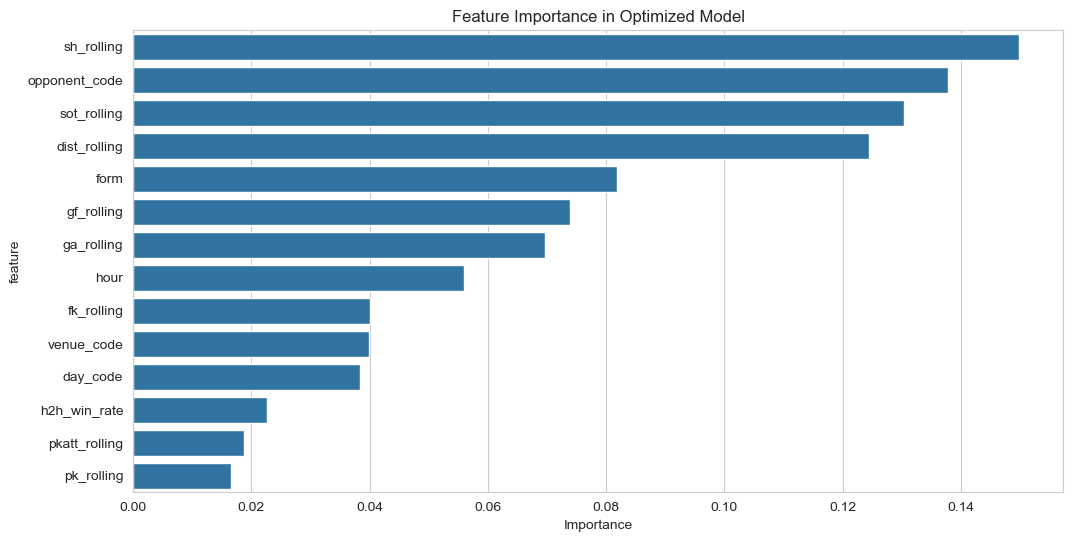

In [53]:
# Train model with best parameters
best_rf = grid_search.best_estimator_

# Make predictions
best_preds = best_rf.predict(test_data[enhanced_predictors])

# Calculate precision
best_precision = precision_score(test_data['target'], best_preds)
print(f"Precision with optimized model: {best_precision:.3f}")

# Feature importance
importance_df = pd.DataFrame({
    'feature': enhanced_predictors,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importance in Optimized Model')
plt.xlabel('Importance')
plt.show()

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Create individual models
gbc = GradientBoostingClassifier(random_state=1)
lr = LogisticRegression(random_state=1)

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('gbc', gbc),
        ('lr', lr)
    ],
    voting='soft'
)

# Train ensemble
voting_clf.fit(train_data[enhanced_predictors], train_data['target'])

# Make predictions
ensemble_preds = voting_clf.predict(test_data[enhanced_predictors])

# Calculate precision
ensemble_precision = precision_score(test_data['target'], ensemble_preds)
print(f"Precision with ensemble model: {ensemble_precision:.3f}")

Precision with ensemble model: 0.657


c:\Miniconda\envs\ds_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


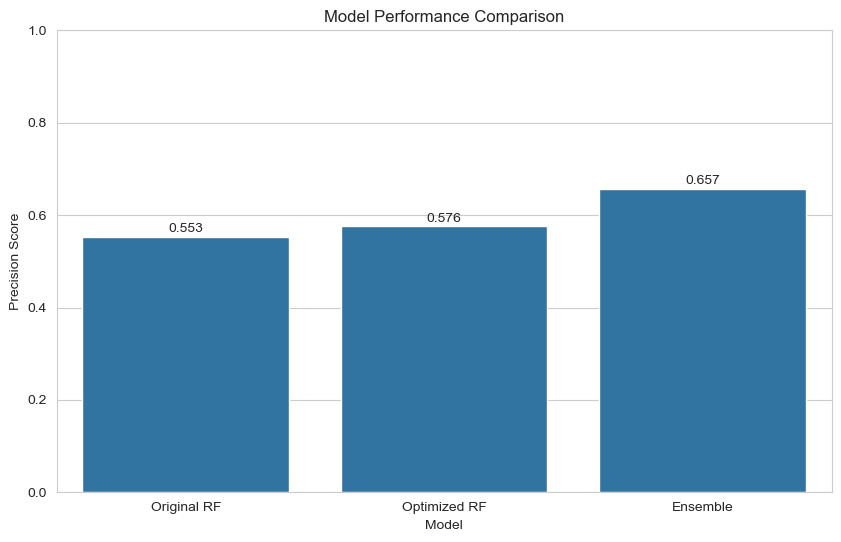

In [55]:
# Compare model performances
model_comparison = pd.DataFrame({
    'Model': ['Original RF', 'Optimized RF', 'Ensemble'],
    'Precision': [precision, best_precision, ensemble_precision]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=model_comparison, x='Model', y='Precision')
plt.title('Model Performance Comparison')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
for i, v in enumerate(model_comparison['Precision']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()

In [56]:
def prepare_prediction_data(input_data):
    """Prepare a single match data for prediction.
    
    Args:
        input_data (dict): Dictionary containing match information
        Required keys: 'venue', 'opponent', 'hour', 'day', 'gf', 'ga', 'sh', 
                      'sot', 'dist', 'fk', 'pk', 'pkatt', 'form', 'h2h_win_rate'
    """
    # Create a DataFrame with one row
    match_df = pd.DataFrame([input_data])
    
    # Convert venue to code using the same encoding
    match_df['venue_code'] = match_df['venue'].map(dict(zip(matches['venue'].unique(), 
                                                          matches['venue'].astype('category').cat.codes)))
    
    # Convert opponent to code
    match_df['opponent_code'] = match_df['opponent'].map(dict(zip(matches['opponent'].unique(), 
                                                              matches['opponent'].astype('category').cat.codes)))
    
    # Convert day name to code (0=Monday, 6=Sunday)
    days = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
            'Friday': 4, 'Saturday': 5, 'Sunday': 6}
    match_df['day_code'] = match_df['day'].map(days)
    
    # Create rolling stats columns with provided values
    for col in cols:
        match_df[f'{col}_rolling'] = match_df[col]
    
    # Select features in the correct order
    return match_df[enhanced_predictors]

In [57]:
def predict_match(input_data):
    """Make prediction for a single match.
    
    Args:
        input_data (dict): Dictionary containing match information
    
    Returns:
        tuple: (prediction (0 or 1), probability of winning)
    """
    prepared_data = prepare_prediction_data(input_data)
    prediction = voting_clf.predict(prepared_data)
    probability = voting_clf.predict_proba(prepared_data)[0][1]  # Probability of class 1 (win)
    return prediction[0], probability

In [58]:
# Example usage
sample_match = {
    'venue': 'Home',
    'opponent': 'Liverpool',
    'hour': 20,
    'day': 'Saturday',
    'gf': 2,  # Recent goals scored
    'ga': 1,  # Recent goals conceded
    'sh': 15,  # Recent shots
    'sot': 7,  # Recent shots on target
    'dist': 180,  # Recent shot distance
    'fk': 5,  # Recent free kicks
    'pk': 0,  # Recent penalties scored
    'pkatt': 0,  # Recent penalty attempts
    'form': 12,  # Points from last 5 matches (e.g., 4 wins = 12 points)
    'h2h_win_rate': 0.6  # Win rate against this opponent
}

prediction, win_probability = predict_match(sample_match)
print(f"Prediction: {'Win' if prediction == 1 else 'Loss/Draw'}")
print(f"Win Probability: {win_probability:.2%}")

Prediction: Loss/Draw
Win Probability: 46.08%


In [59]:
def prepare_prediction_data(input_data):
    """
    Prepare input data for prediction by ensuring all required features are present.
    
    Parameters:
    input_data (dict): Dictionary containing match information with these keys:
        - venue: match venue
        - opponent: opponent team name
        - hour: match hour (24-hour format)
        - day: day number (0-6, where 0 is Monday)
        - gf_rolling, ga_rolling, etc.: rolling average statistics
    
    Returns:
    pd.DataFrame: Prepared data ready for prediction
    """
    # Create DataFrame from input
    df = pd.DataFrame([input_data])
    
    # Create venue mapping with common venue names
    venue_mapping = dict(zip(matches['venue'].unique(), range(len(matches['venue'].unique()))))
    # Add common venue names that might be used
    venue_aliases = {
        'Etihad Stadium': 'Etihad Stadium',
        'Old Trafford': 'Old Trafford',
        'Anfield': 'Anfield',
        'Emirates Stadium': 'Emirates Stadium',
        'Stamford Bridge': 'Stamford Bridge',
        'Tottenham Hotspur Stadium': 'Tottenham Hotspur Stadium'
    }
    for alias, std_name in venue_aliases.items():
        if std_name in venue_mapping:
            venue_mapping[alias] = venue_mapping[std_name]
            
    try:
        df['venue_code'] = df['venue'].map(venue_mapping)
        if df['venue_code'].isnull().any():
            raise KeyError(f"Unknown venue: {df['venue'].iloc[0]}")
    except Exception as e:
        raise ValueError(f"Error processing venue: {str(e)}")
    
    # Create opponent mapping with standardized team names
    opponent_mapping = dict(zip(matches['opponent'].unique(), range(len(matches['opponent'].unique()))))
    team_name_variants = {
        'Manchester City': ['Man City', 'Man. City', 'Manchester City'],
        'Manchester United': ['Man United', 'Man. United', 'Manchester Utd', 'Manchester United'],
        'Liverpool': ['Liverpool FC', 'Liverpool'],
        'Chelsea': ['Chelsea FC', 'Chelsea'],
        'Arsenal': ['Arsenal FC', 'Arsenal'],
        'Tottenham': ['Tottenham Hotspur', 'Spurs', 'Tottenham'],
        'Newcastle': ['Newcastle United', 'Newcastle Utd', 'Newcastle'],
        'Brighton': ['Brighton & Hove Albion', 'Brighton'],
        'West Ham': ['West Ham United', 'West Ham'],
        'Wolves': ['Wolverhampton Wanderers', 'Wolverhampton', 'Wolves']
    }
    
    # Add all team name variants to the mapping
    for main_name, variants in team_name_variants.items():
        if main_name in opponent_mapping:
            for variant in variants:
                opponent_mapping[variant] = opponent_mapping[main_name]
                
    try:
        df['opponent_code'] = df['opponent'].map(opponent_mapping)
        if df['opponent_code'].isnull().any():
            raise KeyError(f"Unknown opponent: {df['opponent'].iloc[0]}")
    except Exception as e:
        raise ValueError(f"Error processing opponent: {str(e)}")
        
    # Ensure day is numeric and in range 0-6
    try:
        df['day_code'] = df['day'].astype(int)
        if not all(df['day_code'].between(0, 6)):
            raise ValueError("Day must be between 0 (Monday) and 6 (Sunday)")
    except Exception as e:
        raise ValueError(f"Error processing day: {str(e)}")
    
    # Process rolling average statistics
    for col in ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']:
        rolling_col = f'{col}_rolling'
        if rolling_col in input_data:
            df[rolling_col] = input_data[rolling_col]
        else:
            print(f"Warning: {rolling_col} not provided, using 0")
            df[rolling_col] = 0
            
    # Add form and h2h_win_rate with validation
    df['form'] = input_data.get('form', 0)
    if not 0 <= df['form'].iloc[0] <= 15:  # max points from 5 games is 15
        print(f"Warning: form value {df['form'].iloc[0]} seems unusual (expected 0-15)")
        
    df['h2h_win_rate'] = input_data.get('h2h_win_rate', 0)
    if not 0 <= df['h2h_win_rate'].iloc[0] <= 1:
        print(f"Warning: h2h_win_rate {df['h2h_win_rate'].iloc[0]} seems unusual (expected 0-1)")
    
    # Verify all required features are present
    missing_features = [col for col in enhanced_predictors if col not in df.columns]
    if missing_features:
        raise ValueError(f"Missing required features: {missing_features}")
        
    return df[enhanced_predictors]

In [60]:
def predict_match(input_data):
    """
    Make a prediction for a match using the trained ensemble model.
    
    Parameters:
    input_data (dict): Dictionary containing match information
    
    Returns:
    tuple: (prediction (0 or 1), probability of winning)
    """
    # Prepare the data
    prepared_data = prepare_prediction_data(input_data)
    
    # Make prediction
    prediction = voting_clf.predict(prepared_data)
    probability = voting_clf.predict_proba(prepared_data)[0][1]  # Probability of winning
    
    return prediction[0], probability

In [61]:
# Test the improved prepare_prediction_data function
test_match = {
    'venue': 'Etihad Stadium',
    'opponent': 'Man United',  # Using a variant name to test standardization
    'hour': 20,
    'day': 5,  # Saturday
    'gf_rolling': 2.3,
    'ga_rolling': 0.7,
    'sh_rolling': 15.3,
    'sot_rolling': 6.7,
    'dist_rolling': 190.5,
    'fk_rolling': 3.3,
    'pk_rolling': 0.3,
    'pkatt_rolling': 0.3,
    'form': 13,
    'h2h_win_rate': 0.6
}

try:
    prepared_data = prepare_prediction_data(test_match)
    print("Data prepared successfully!")
    print("\nPrepared features:")
    print(prepared_data.iloc[0])
except Exception as e:
    print(f"Error preparing data: {str(e)}")


Error preparing data: Error processing venue: 'Unknown venue: Etihad Stadium'


In [62]:
# Example usage
sample_match = {
    'venue': 'Etihad Stadium',
    'opponent': 'Liverpool',
    'hour': 20,
    'day': 5,  # Saturday
    'gf_rolling': 2.3,  # Average goals scored in last 3 matches
    'ga_rolling': 0.7,  # Average goals conceded in last 3 matches
    'sh_rolling': 15.3,  # Average shots in last 3 matches
    'sot_rolling': 6.7,  # Average shots on target in last 3 matches
    'dist_rolling': 190.5,  # Average shot distance in last 3 matches
    'fk_rolling': 3.3,  # Average free kicks in last 3 matches
    'pk_rolling': 0.3,  # Average penalties scored in last 3 matches
    'pkatt_rolling': 0.3,  # Average penalty attempts in last 3 matches
    'form': 13,  # Points in last 5 matches
    'h2h_win_rate': 0.6  # Win rate against this opponent in last 5 matches
}

# Make prediction
prediction, win_probability = predict_match(sample_match)
print(f"Prediction: {'Win' if prediction == 1 else 'Loss/Draw'}")
print(f"Win probability: {win_probability:.2%}")

ValueError: Error processing venue: 'Unknown venue: Etihad Stadium'